In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns


In [2]:
# Generate a synthetic dataset with 1000 samples, 10 features, and 5 classes
X, y = make_classification(n_samples=1000, n_features=10, n_informative=8, n_classes=5, n_clusters_per_class=1, random_state=42)

# One-hot encode the labels for multi-class classification
encoder = OneHotEncoder(sparse=False)
Y = encoder.fit_transform(y.reshape(-1, 1))

# Split into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


c:\Anaconda\envs\my-new-env\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [3]:
class NeuralNetwork(object):
    def __init__(self):
        inputLayerNeurons = 10  # Number of input features
        hiddenLayer1Neurons = 64
        hiddenLayer2Neurons = 32
        hiddenLayer3Neurons = 16
        outputLayerNeurons = 5  # Five classes

        self.learning_rate = 0.01

        # Weight initialization for three hidden layers and output layer
        self.W_H1 = np.random.randn(inputLayerNeurons, hiddenLayer1Neurons)
        self.W_H2 = np.random.randn(hiddenLayer1Neurons, hiddenLayer2Neurons)
        self.W_H3 = np.random.randn(hiddenLayer2Neurons, hiddenLayer3Neurons)
        self.W_O = np.random.randn(hiddenLayer3Neurons, outputLayerNeurons)

    def sigmoid(self, x, der=False):
        if der:
            return x * (1 - x)
        return 1 / (1 + np.exp(-x))

    def softmax(self, x):
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_x / np.sum(exp_x, axis=1, keepdims=True)

    def feedForward(self, X):
        self.z1 = np.dot(X, self.W_H1)
        self.a1 = self.sigmoid(self.z1)

        self.z2 = np.dot(self.a1, self.W_H2)
        self.a2 = self.sigmoid(self.z2)

        self.z3 = np.dot(self.a2, self.W_H3)
        self.a3 = self.sigmoid(self.z3)

        self.z4 = np.dot(self.a3, self.W_O)
        pred = self.softmax(self.z4)
        return pred

    def backPropagation(self, X, Y, pred):
        output_error = Y - pred
        output_delta = output_error  # No derivative for softmax and cross-entropy

        hidden_error3 = output_delta.dot(self.W_O.T)
        hidden_delta3 = hidden_error3 * self.sigmoid(self.a3, der=True)

        hidden_error2 = hidden_delta3.dot(self.W_H3.T)
        hidden_delta2 = hidden_error2 * self.sigmoid(self.a2, der=True)

        hidden_error1 = hidden_delta2.dot(self.W_H2.T)
        hidden_delta1 = hidden_error1 * self.sigmoid(self.a1, der=True)

        # Updating the weights
        self.W_O += self.a3.T.dot(output_delta) * self.learning_rate
        self.W_H3 += self.a2.T.dot(hidden_delta3) * self.learning_rate
        self.W_H2 += self.a1.T.dot(hidden_delta2) * self.learning_rate
        self.W_H1 += X.T.dot(hidden_delta1) * self.learning_rate

    def train(self, X, Y):
        output = self.feedForward(X)
        self.backPropagation(X, Y, output)
        
    def predict(self, X):
        pred = self.feedForward(X)
        return np.argmax(pred, axis=1)  # Returning the index of the highest probability class


In [4]:
NN = NeuralNetwork()

# Train the neural network
epochs = 500
for epoch in range(epochs):
    NN.train(X_train, Y_train)
    if epoch % 10 == 0:
        train_pred = NN.predict(X_train)
        train_true = np.argmax(Y_train, axis=1)
        print(f"Epoch {epoch}: Train accuracy = {accuracy_score(train_true, train_pred)}")


Epoch 0: Train accuracy = 0.20875
Epoch 10: Train accuracy = 0.20125
Epoch 20: Train accuracy = 0.34625
Epoch 30: Train accuracy = 0.37125
Epoch 40: Train accuracy = 0.34875
Epoch 50: Train accuracy = 0.32875
Epoch 60: Train accuracy = 0.3425
Epoch 70: Train accuracy = 0.39
Epoch 80: Train accuracy = 0.4125
Epoch 90: Train accuracy = 0.4425
Epoch 100: Train accuracy = 0.6225
Epoch 110: Train accuracy = 0.57875
Epoch 120: Train accuracy = 0.55625
Epoch 130: Train accuracy = 0.6725
Epoch 140: Train accuracy = 0.7925
Epoch 150: Train accuracy = 0.83375
Epoch 160: Train accuracy = 0.88125
Epoch 170: Train accuracy = 0.9125
Epoch 180: Train accuracy = 0.92875
Epoch 190: Train accuracy = 0.94375
Epoch 200: Train accuracy = 0.94875
Epoch 210: Train accuracy = 0.52375
Epoch 220: Train accuracy = 0.945
Epoch 230: Train accuracy = 0.96
Epoch 240: Train accuracy = 0.97125
Epoch 250: Train accuracy = 0.9775
Epoch 260: Train accuracy = 0.9825
Epoch 270: Train accuracy = 0.985
Epoch 280: Train accur

In [5]:
# Evaluate on the test set
test_pred = NN.predict(X_test)
test_true = np.argmax(Y_test, axis=1)

print("Test Accuracy:", accuracy_score(test_true, test_pred))
print("\nClassification Report:\n", classification_report(test_true, test_pred))


Test Accuracy: 0.875

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89        42
           1       0.85      0.88      0.87        33
           2       0.91      0.80      0.85        40
           3       0.81      0.83      0.82        41
           4       0.90      0.98      0.93        44

    accuracy                           0.88       200
   macro avg       0.88      0.87      0.87       200
weighted avg       0.88      0.88      0.87       200



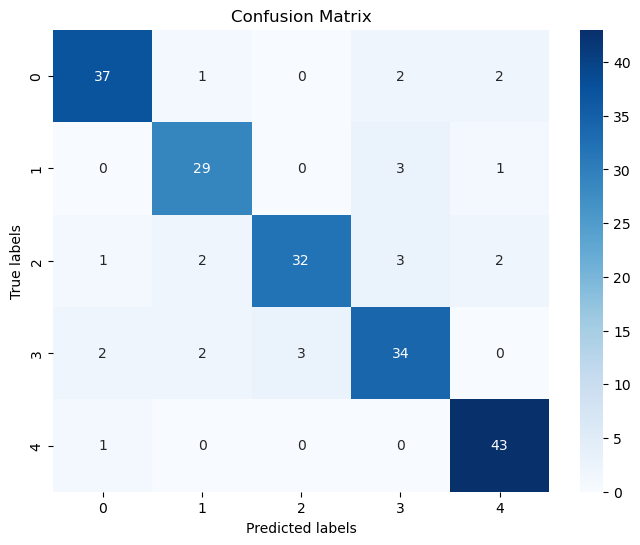

In [6]:
# Confusion matrix
conf_matrix = confusion_matrix(test_true, test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt='g')
plt.title("Confusion Matrix")
plt.ylabel('True labels')
plt.xlabel('Predicted labels')
plt.show()
